# PYMACEUTICALS, INC.

In [215]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [216]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [217]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [218]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df[df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [219]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df_cleaned = df.drop_duplicates(["Mouse ID", "Timepoint"], keep='first')
df_cleaned = df.loc[df["Mouse ID"] != "g989"]
df_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [220]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = df_cleaned["Mouse ID"]
unique_mice_count.nunique()

248

# Summary Statistics

In [221]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = df.groupby("Drug Regimen")

# Stats
summary_stats = grouped_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.column = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats.columns = [
    "Mean Tumor Volume", 
    "Median Tumor Volume", 
    "Tumor Volume Variance", 
    "Tumor Volume Std. Dev.", 
    "Tumor Volume Std. Err."
]
summary_df = pd.DataFrame(summary_stats)
summary_df


C:\Users\samri\AppData\Local\Temp\ipykernel_33976\1711418092.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  summary_stats.column = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [222]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = df_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

summary_df


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

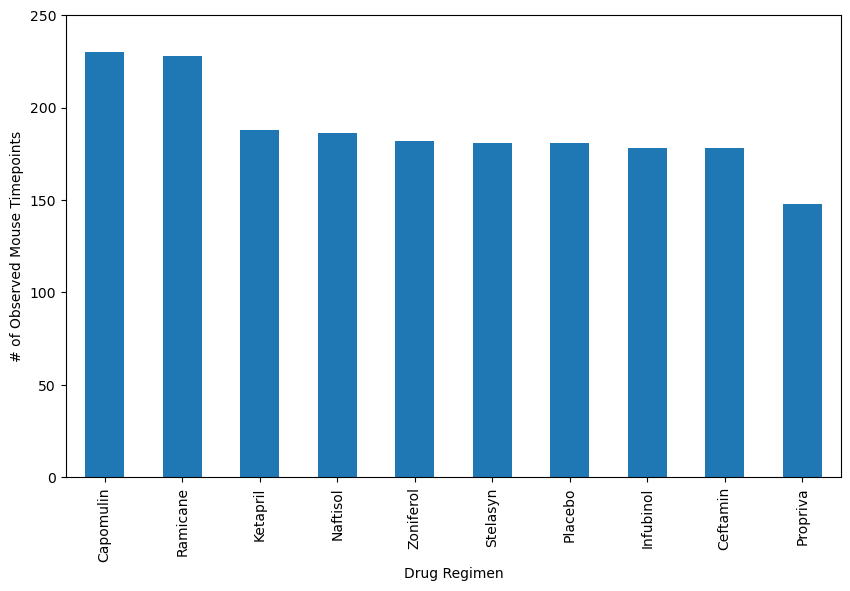

In [249]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = df_cleaned["Drug Regimen"].value_counts()
mouse_count.plot(kind="bar", figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0,250)
plt.xticks(rotation=90)
plt.show()

In [250]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count_py = df_cleaned["Drug Regimen"].value_counts()
figsize=(10,6)
plt.plotbar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.ylim(0,250)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plotbar'

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
